<a href="https://colab.research.google.com/github/dariRusAG/MachineLearning/blob/main/%D0%9B%D0%BE%D0%B3%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%919119_09_03_04%D0%BF%D1%80%D0%BE%D0%B3%D0%B8%D0%BD(1)_%D0%90%D0%B3%D0%B0%D0%BF%D0%BE%D0%B2%D0%B0_%D0%94%D0%B0%D1%80%D1%8C%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 2. Логические методы классификации

1. Задание выполнить в среде Google Colaboratory, сдать в Teams данный файл.
2. Использовать выбранную и закрепленную за вами выборку данных (датасет).
3. Разбить выборку на обучающую и контрольную в пропорциях 80%-20% или 70%-30%.
4. Для алгоритма "Решающее дерево" совместно настроить по минимуму ошибок на обучении и контроле следующие параметры: критерий информативности (criterion:  энтропийный (entropy) или Джини (gini)), глубина дерева (max_depth).
5. Для алгоритма "Случайный лес" совместно настроить по минимуму ошибок на обучении и контроле следующие параметры: количество деревьев (n_estimators), количество признаков для разделения (max_features). Использовать параметры criterion и max_depth, отобранные для алгоритма "Решающее дерево".
6. Материалы: [Машинное обучение (курс лекций, К.В. Воронцов). Логические методы](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_(%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9,_%D0%9A.%D0%92.%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%86%D0%BE%D0%B2)#.D0.9B.D0.BE.D0.B3.D0.B8.D1.87.D0.B5.D1.81.D0.BA.D0.B8.D0.B5_.D0.BC.D0.B5.D1.82.D0.BE.D0.B4.D1.8B_.D0.BA.D0.BB.D0.B0.D1.81.D1.81.D0.B8.D1.84.D0.B8.D0.BA.D0.B0.D1.86.D0.B8.D0.B8).

## Выполнил студент

Агапова Дарья Руслановна

Б9119-09.03.04прогин(1)

## Выборка данных <Image Segmentation Data Set>

* Ссылка на выборку: https://archive.ics.uci.edu/ml/datasets/Image+Segmentation
* Описание выборки: экземпляры выбраны случайным образом из базы данных 7 наружных изображений. Изображения были сегментированы вручную, чтобы создать классификацию для каждого пикселя. Каждый экземпляр представляет собой регион размером 3x3. Задача состоит в определении класса экземпляра.
* Количество классов: 7
* Количество признаков: 19
* Типы признаков: real
* Количество объектов: 2310


## Библиотеки

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from mpl_toolkits import mplot3d
from matplotlib import gridspec
from copy import deepcopy
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm
from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
from sklearn import tree
import itertools
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification, load_wine, load_boston
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from torchvision import datasets
from torchvision import transforms

## Подключение выборки

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/MMO/segmentation.csv', names=["CLASSES", "REGION-CENTROID-COL", "REGION-CENTROID-ROW", "REGION-PIXEL-COUNT", "SHORT-LINE-DENSITY-5", "SHORT-LINE-DENSITY-2", "VEDGE-MEAN", "VEDGE-SD", "HEDGE-MEAN", "HEDGE-SD", "INTENSITY-MEAN", "RAWRED-MEAN", "RAWBLUE-MEAN", "RAWGREEN-MEAN", "EXRED-MEAN", "EXBLUE-MEAN", "EXGREEN-MEAN", "VALUE-MEAN", "SATURATION-MEAN", "HUE-MEAN"], sep=";")

X = data[data.columns[1:]]
Y = data[data.columns[0]]

Mounted at /content/drive


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=30, 
                                                    random_state=0)

## Метод "Решающее дерево" (DecisionTree)

### Зависимость результата от глубины дерева

       Train      Test
0   0.287719  0.133333
1   0.569737  0.500000
2   0.817544  0.866667
3   0.913158  0.833333
4   0.927193  0.900000
5   0.957895  0.933333
6   0.970614  0.966667
7   0.986404  0.966667
8   0.990789  0.966667
9   0.994737  0.966667
10  0.995614  0.966667
11  0.997368  0.966667
12  0.997368  0.966667
13  0.999123  0.966667
14  0.999561  0.966667
15  1.000000  0.966667
16  1.000000  0.966667 



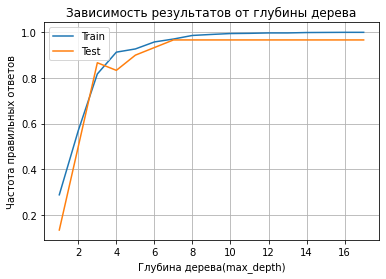

In [ ]:
scores_train = []
scores_test = []

n_max_depth = list(range(1, 18))
for max_depth in n_max_depth:
    model = DecisionTreeClassifier(criterion='entropy', 
                                   max_depth=max_depth, 
                                   random_state=0)
    model.fit(X_train, Y_train)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))

pd_scores_train = np.array(scores_train)
pd_scores_test = np.array(scores_test)

df = pd.DataFrame({'Train': pd_scores_train, 'Test': pd_scores_test})
print(df, '\n')

plt.plot(n_max_depth, scores_train, label='Train')
plt.plot(n_max_depth, scores_test, label='Test')

plt.legend(loc='best')
plt.title('Зависимость результатов от глубины дерева')
plt.xlabel('Глубина дерева(max_depth)')
plt.ylabel('Частота правильных ответов')

plt.grid()
plt.show()

### Зависимость результата от разбиения

      Train      Test
0  0.970614  0.966667
1  0.970614  0.966667
2  0.970614  0.966667
3  0.970614  0.966667
4  0.970614  0.966667
5  0.970614  0.966667
6  0.970614  0.966667
7  0.970614  0.966667
8  0.970614  0.966667
9  0.970614  0.966667 



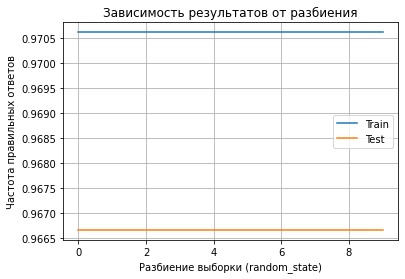

In [ ]:
scores_train = []
scores_test = []

n_random_state = list(range(10))
for random_state in n_random_state:
    model = DecisionTreeClassifier(criterion='entropy', 
                                   max_depth=7, 
                                   random_state=random_state)
    model.fit(X_train, Y_train)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))

pd_scores_train = np.array(scores_train)
pd_scores_test = np.array(scores_test)

df = pd.DataFrame({'Train': pd_scores_train, 'Test': pd_scores_test})
print(df, '\n')

plt.plot(n_random_state, scores_train, label='Train')
plt.plot(n_random_state, scores_test, label='Test')

plt.legend(loc='best')
plt.title('Зависимость результатов от разбиения')
plt.xlabel('Разбиение выборки (random_state)')
plt.ylabel('Частота правильных ответов')

plt.grid()
plt.show()

### Применение алгоритма классификации с лучшими параметрами

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)
model.fit(X_train, Y_train)

print('Train: ', model.score(X_train, Y_train))
print('Test : ', model.score(X_test, Y_test))
print(classification_report(Y_test, model.predict(X_test)))

Train:  0.9706140350877193
Test :  0.9666666666666667
              precision    recall  f1-score   support

   BRICKFACE       1.00      1.00      1.00         3
      CEMENT       1.00      0.86      0.92         7
     FOLIAGE       1.00      1.00      1.00         5
       GRASS       1.00      1.00      1.00         3
        PATH       1.00      1.00      1.00         1
         SKY       1.00      1.00      1.00         8
      WINDOW       0.75      1.00      0.86         3

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



### Графическое представление дерева

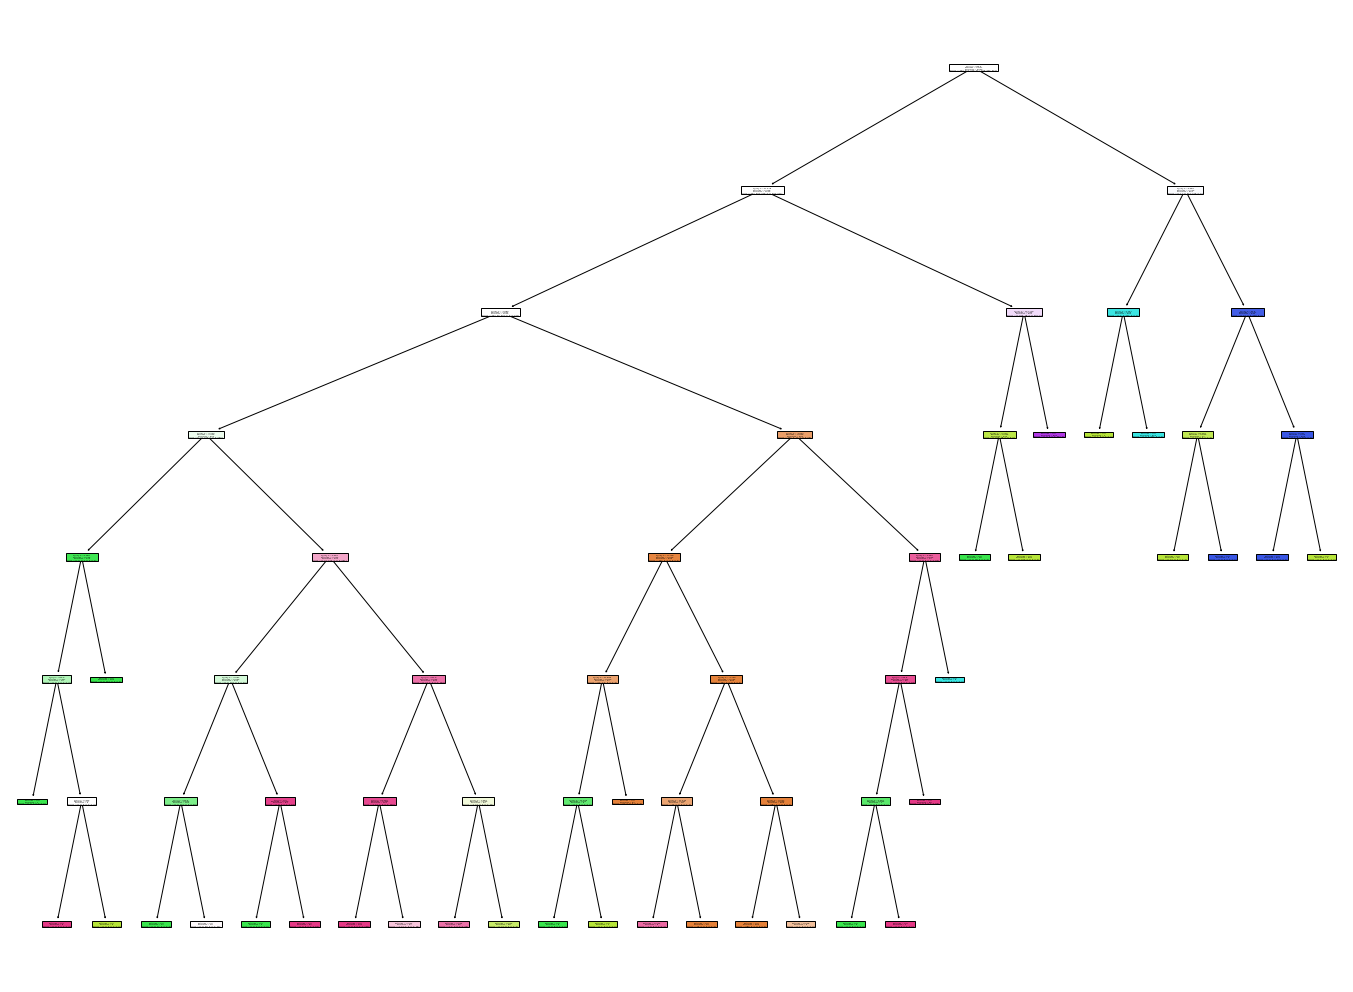

In [ ]:
fig = plt.figure(figsize=(24, 18))
_ = tree.plot_tree(model, filled=True)

## Алгоритм "Случайный лес" (RandomForest)

1. Количество деревьев (n_estimators) нужно подбирать, т.к. большое их количество увеличивает качество на обучении, но на контроле, может быть меньше или не меняться вовсе, при этом время обучении возрастает.
2. Важным параметров является количество признаков (max_features), которые участвуют в построении правила разделения. Обычно для классификации используется $\sqrt{n}$, где n – общее количество признаков. Параметр является важным, т.к. при его увеличении деревья становятся похожими друг на друга.
3. Параметр глубина деревьев (max_depth) можно не подбирать, т.к. деревья сами настраивают его. Но если выборка слишком шумная, рекомендуется не использовать слишком глубокие деревья.

### Зависимость качества от числа признаков при расщеплении

      Train      Test
0  0.993860  0.933333
1  0.996053  0.933333
2  0.998246  0.933333
3  0.997807  0.933333
4  0.996930  1.000000
5  0.997807  0.966667
6  0.998684  0.966667
7  0.998246  0.966667
8  0.995614  0.933333
9  0.996491  0.966667 



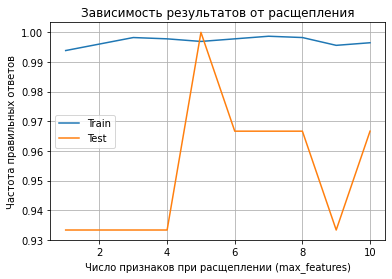

In [ ]:
scores_train = []
scores_test = []

max_features = list(range(1, 11))
for features in max_features:
    model = RandomForestClassifier(criterion='entropy', 
                                   n_estimators=6,
                                   max_features=features, 
                                   random_state=0)
    model.fit(X_train, Y_train)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))

pd_scores_train = np.array(scores_train)
pd_scores_test = np.array(scores_test)

df = pd.DataFrame({'Train': pd_scores_train, 'Test': pd_scores_test})
print(df, '\n')

plt.plot(max_features, scores_train, label='Train')
plt.plot(max_features, scores_test, label='Test')

plt.legend(loc='best')
plt.title('Зависимость результатов от расщепления')
plt.xlabel('Число признаков при расщеплении (max_features)')
plt.ylabel('Частота правильных ответов')

plt.grid()
plt.show()

### Зависимость результата от количества деревьев

       Train      Test
0   0.978070  0.900000
1   0.983333  0.933333
2   0.992105  0.966667
3   0.994737  1.000000
4   0.996053  1.000000
5   0.996930  1.000000
6   0.997807  1.000000
7   0.997807  1.000000
8   0.998684  1.000000
9   0.998246  1.000000
10  0.999561  0.966667
11  1.000000  0.966667
12  0.999561  1.000000
13  0.999561  1.000000
14  0.999561  1.000000
15  0.999561  1.000000
16  0.999561  0.966667 



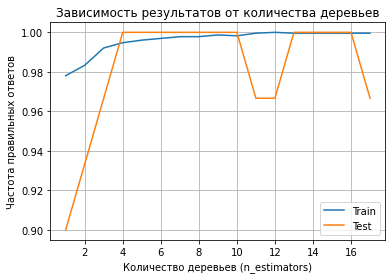

In [ ]:
scores_train = []
scores_test = []

n_estimators = list(range(1, 18))
for estimators in n_estimators:
    model = RandomForestClassifier(criterion='entropy', 
                                   n_estimators=estimators,
                                   max_features=5, 
                                   random_state=0)
    model.fit(X_train, Y_train)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))

pd_scores_train = np.array(scores_train)
pd_scores_test = np.array(scores_test)

df = pd.DataFrame({'Train': pd_scores_train, 'Test': pd_scores_test})
print(df, '\n')

plt.plot(n_estimators, scores_train, label='Train')
plt.plot(n_estimators, scores_test, label='Test')

plt.legend(loc='best')
plt.title('Зависимость результатов от количества деревьев')
plt.xlabel('Количество деревьев (n_estimators)')
plt.ylabel('Частота правильных ответов')

plt.grid()
plt.show()

### Зависимость результата от разбиения

      Train      Test
0  0.998246  1.000000
1  1.000000  0.966667
2  0.999561  0.966667
3  0.999561  0.966667
4  1.000000  0.966667
5  0.999123  0.966667
6  0.997807  0.966667
7  0.999561  0.966667
8  1.000000  0.966667
9  0.999561  0.966667 



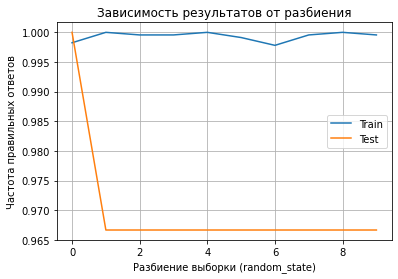

In [ ]:
scores_train = []
scores_test = []

n_random_state = list(range(10))
for random_state in n_random_state:
    model = RandomForestClassifier(criterion='entropy', 
                                   n_estimators=10,
                                   max_features=5, 
                                   random_state=random_state)
    model.fit(X_train, Y_train)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))

pd_scores_train = np.array(scores_train)
pd_scores_test = np.array(scores_test)

df = pd.DataFrame({'Train': pd_scores_train, 'Test': pd_scores_test})
print(df, '\n')

plt.plot(n_random_state, scores_train, label='Train')
plt.plot(n_random_state, scores_test, label='Test')

plt.legend(loc='best')
plt.title('Зависимость результатов от разбиения')
plt.xlabel('Разбиение выборки (random_state)')
plt.ylabel('Частота правильных ответов')

plt.grid()
plt.show()

### Зависимость результата от глубины деревьев

       Train      Test  Real depth
0   0.564474  0.466667    1.000000
1   0.752193  0.700000    1.000000
2   0.894737  0.900000    1.000000
3   0.916667  0.900000    1.000000
4   0.943421  0.900000    1.000000
5   0.965789  0.966667    1.000000
6   0.975000  0.966667    1.000000
7   0.989035  0.966667    1.000000
8   0.992982  0.966667    1.000000
9   0.994737  0.966667    1.000000
10  0.997807  1.000000    1.000000
11  0.999123  0.966667    1.000000
12  0.998246  0.966667    0.923077
13  0.999123  0.966667    0.857143
14  1.000000  0.966667    0.800000
15  0.999561  0.966667    0.750000
16  0.999561  0.966667    0.705882
17  1.000000  0.966667    0.666667
18  1.000000  0.966667    0.631579 



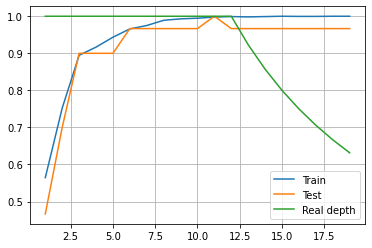

In [ ]:
scores_train = []
scores_test = []
current_depth = []
max_depth = list(range(1, 20))
for depth in max_depth:
    model = RandomForestClassifier(criterion='entropy', 
                                   n_estimators=10, 
                                   max_depth=depth,
                                  #  max_features=5,
                                   random_state=0)
    model.fit(X_train, Y_train)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))
    current_depth.append(model.estimators_[0].get_depth()/depth)

pd_scores_train = np.array(scores_train)
pd_scores_test = np.array(scores_test)
pd_current_depth = np.array(current_depth)

df = pd.DataFrame({'Train': pd_scores_train, 'Test': pd_scores_test, 'Real depth': current_depth})
print(df, '\n')

plt.plot(max_depth, scores_train, label='Train')
plt.plot(max_depth, scores_test, label='Test')
plt.plot(max_depth, current_depth, label='Real depth')

plt.legend(loc='Best')
plt.grid()
plt.show()

### Применение алгоритма классификации c лучшими параметрами

In [ ]:
model = RandomForestClassifier(criterion='entropy', 
                               n_estimators=10, 
                               max_depth=11,
                               random_state=0)
model.fit(X_train, Y_train)

print('Train: ', model.score(X_train, Y_train))
print('Test : ', model.score(X_test, Y_test))
print(classification_report(Y_test, model.predict(X_test)))

Train:  0.9978070175438597
Test :  1.0
              precision    recall  f1-score   support

   BRICKFACE       1.00      1.00      1.00         3
      CEMENT       1.00      1.00      1.00         7
     FOLIAGE       1.00      1.00      1.00         5
       GRASS       1.00      1.00      1.00         3
        PATH       1.00      1.00      1.00         1
         SKY       1.00      1.00      1.00         8
      WINDOW       1.00      1.00      1.00         3

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



---


# Заключение

## 1. Алгорим "Решающее дерево" (DecisionTree)

* Критерий информативности: criterion=entropy
* Глубина дерева: max_depth=7
* Качество на обучающей выборке: 0.97
* Качество на контрольной выборке: 0.97

## 2. Алгоритм "Случайный лес" (RandomForest)

* Количество деревьев: n_estimators=10
* Признаки для разделения: max_features=5
* Качество на обучающей выборке: 1.0
* Качество на контрольной выборке: 1.0

## 3. Вывод

Лучший результат продемонстрировал алгоритм "Случайный лес" (RandomForest)